In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('companies_sorted.csv')
df.head()

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960


In [ ]:
#fetching the info on the data 
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 7173426 rows and 11 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   name                       object 
 2   domain                     object 
 3   year founded               float64
 4   industry                   object 
 5   size range                 object 
 6   locality                   object 
 7   country                    object 
 8   linkedin url               object 
 9   current employee estimate  int64  
 10  total employee estimate    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 602.0+ MB


In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'domain', 'year founded', 'industry',
       'size range', 'locality', 'country', 'linkedin url',
       'current employee estimate', 'total employee estimate'],
      dtype='object')

In [ ]:
#droping uncessary columns
df =df.drop(columns=["linkedin url"])

In [ ]:
print(f"Now data set has {df.shape[0]} rows and {df.shape[1]} columns")

Now data set has 7173426 rows and 10 columns


In [ ]:
df = df.drop(columns=["Unnamed: 0"])
print(df.describe())

       year founded  current employee estimate  total employee estimate
count  3.566446e+06               7.173426e+06             7.173426e+06
mean   2.001747e+03               1.387121e+01             3.225438e+01
std    2.096627e+01               3.545919e+02             8.741556e+02
min    1.451000e+03               0.000000e+00             1.000000e+00
25%    1.999000e+03               1.000000e+00             1.000000e+00
50%    2.009000e+03               1.000000e+00             2.000000e+00
75%    2.013000e+03               4.000000e+00             7.000000e+00
max    2.103000e+03               2.740470e+05             7.169060e+05


In [ ]:
#checking for duplicate value
df.duplicated().sum()

np.int64(0)

In [ ]:
print(f"There are {df.isnull().any().sum()} columns in the dataset with missing values")

There are 6 columns in the dataset with missing values


In [ ]:
df.isnull().sum()

Unnamed: 0                         0
name                               3
domain                       1650621
year founded                 3606980
industry                      290003
size range                         0
locality                     2508825
country                      2349207
linkedin url                       0
current employee estimate          0
total employee estimate            0
dtype: int64

In [ ]:
(df.isnull().sum() / len(df)) * 100 #in percentage

Unnamed: 0                    0.000000
name                          0.000042
domain                       23.010219
year founded                 50.282529
industry                      4.042741
size range                    0.000000
locality                     34.973874
country                      32.748745
linkedin url                  0.000000
current employee estimate     0.000000
total employee estimate       0.000000
dtype: float64

In [ ]:
cat_cols = ['name', 'industry', 'domain']
for col in cat_cols:
    m = df[col].mode()[0]
    df[col].fillna(m, inplace=True)

print(df[cat_cols].isnull().sum()) #checking if any null values are left after replacing


In [ ]:
#replacing missing value of countries and cities(if the values are missing from both from same row)
missing_both = df[df['locality'].isnull() & df['country'].isnull()].shape[0]
total_rows = df.shape[0]
print(f"Rows with both missing: {missing_both} / {total_rows} ({missing_both/total_rows*100:.2f}%)")

Rows with both missing: 2349207 / 7173426 (32.75%)


In [ ]:
for col in ['locality', 'country']:
    mode1 = df[col].mode()[0]
    df.fillna({col: mode1}, inplace =True)

print(df['locality'].isnull().sum())  #checking if null value exsist
print(df['country'].isnull().sum())

0
0


Index(['Unnamed: 0', 'year founded', 'current employee estimate',
       'total employee estimate'],
      dtype='object')


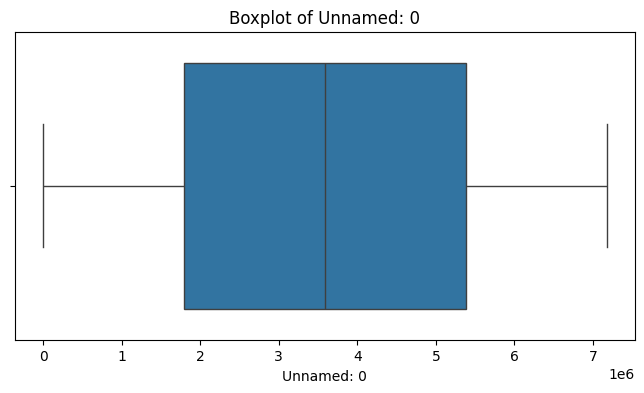

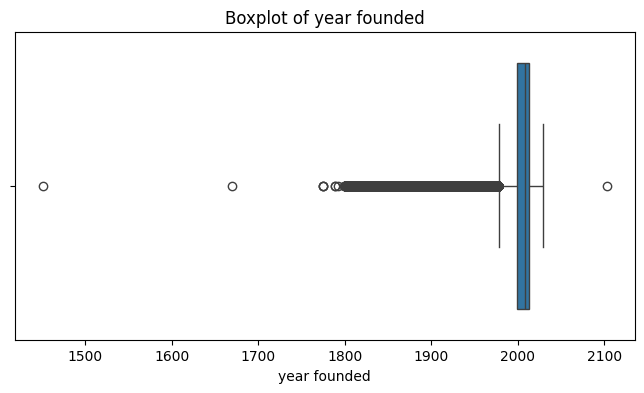

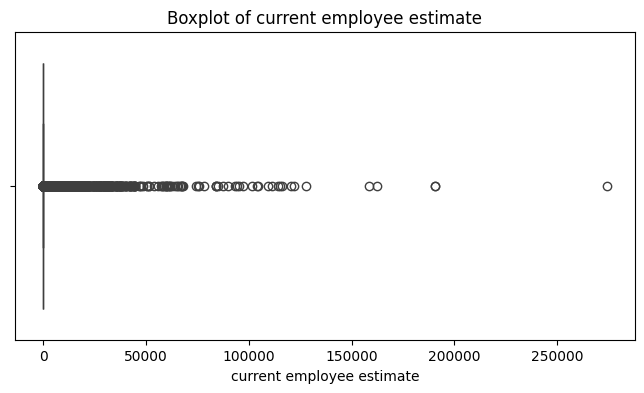

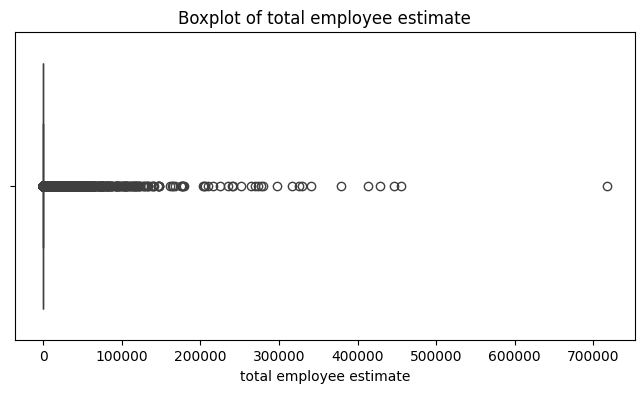

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [7]:
#outlier treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 + IQR)
    upper_range = Q3+(1.5 + IQR)
    return lower_range,upper_range

In [8]:
lcuremp,ucuremp = remove_outlier(df['current employee estimate'])
df['current employee estimate'] = np.where(df['current employee estimate']>ucuremp,ucuremp,df['current employee estimate'])
df['current employee estimate'] = np.where(df['current employee estimate']<lcuremp,lcuremp,df['current employee estimate'])

lcuremp_total,ucuremp_total = remove_outlier(df['total employee estimate'])
df['total employee estimate'] = np.where(df['total employee estimate']>ucuremp_total,ucuremp_total,df['total employee estimate'])
df['total employee estimate'] = np.where(df['total employee estimate']<lcuremp_total,lcuremp_total,df['total employee estimate'])

In [9]:
df[['current employee estimate','total employee estimate']].describe()

,current employee estimate,total employee estimate
count,7.173426e+06,7.173426e+06
mean,2.579311e+00,4.942349e+00
std,2.828715e+00,5.011088e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00
50%,1.000000e+00,2.000000e+00
75%,4.000000e+00,7.000000e+00
max,8.500000e+00,1.450000e+01


Index(['Unnamed: 0', 'year founded', 'current employee estimate',
       'total employee estimate'],
      dtype='object')


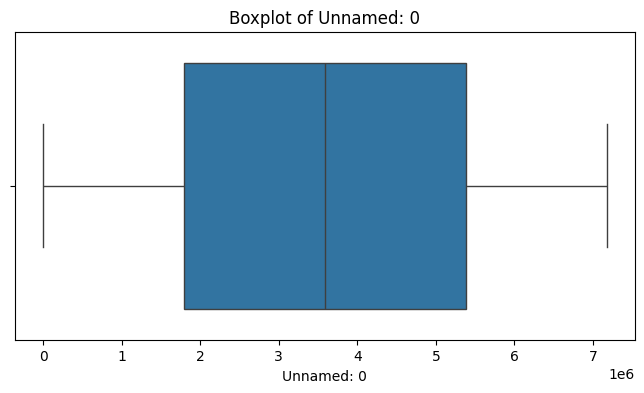

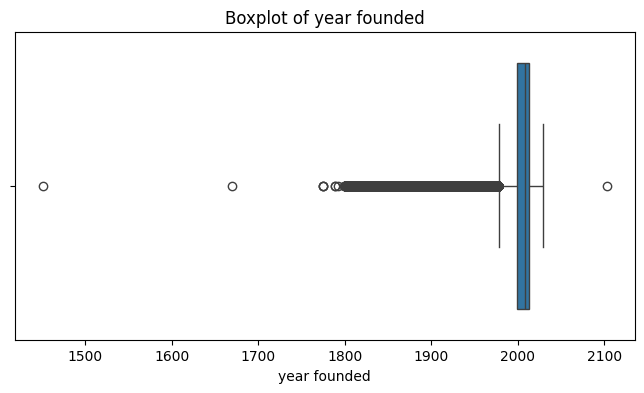

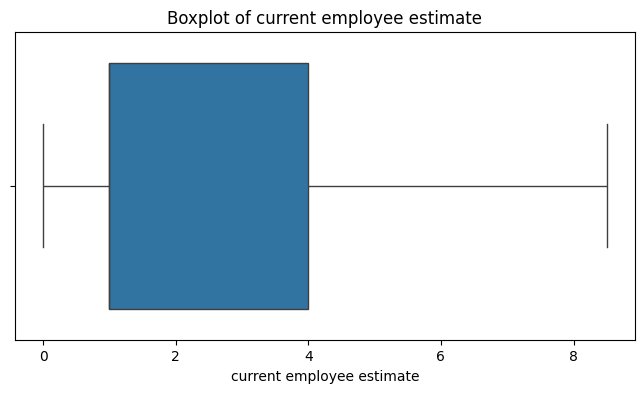

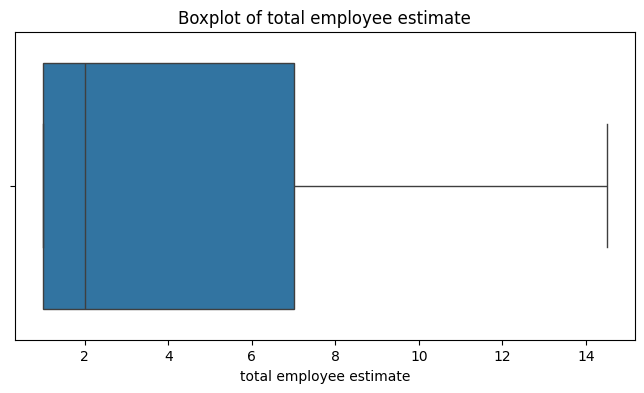

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

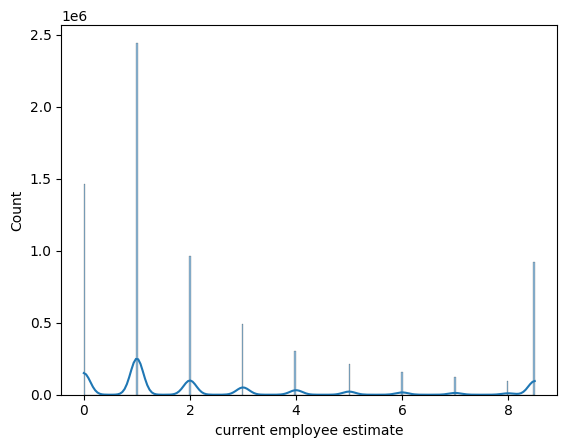

In [11]:
sns.histplot(df['current employee estimate'], kde=True)
plt.show()

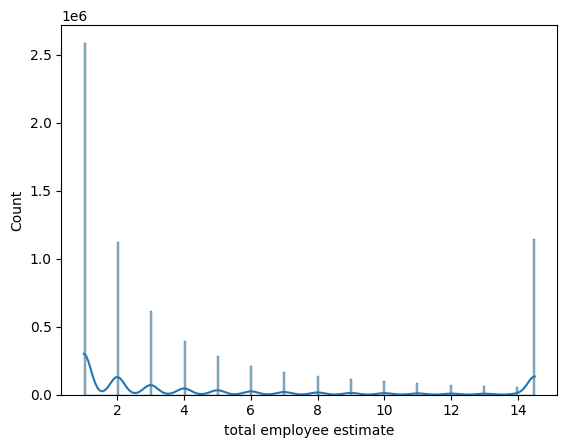

In [12]:
sns.histplot(df['total employee estimate'], kde=True)
plt.show()

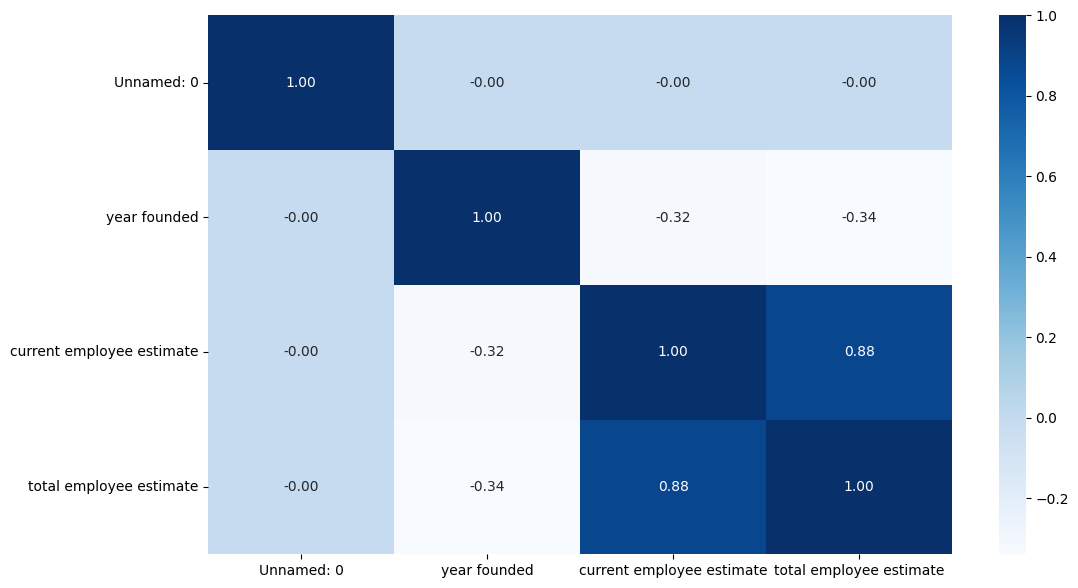

In [24]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()